# Package & data

In [7]:
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# Load the training and testing data
data_split = joblib.load('../data/processed/data_split.joblib')

# Extract split
X_train = data_split['X_train']
X_test = data_split['X_test']
y_train = data_split['y_train']
y_test = data_split['y_test']

In [9]:
# load les modèles
logistic_model = joblib.load('../models/logistic_model.joblib')
decision_tree_model = joblib.load('../models/decision_tree_model.joblib')
gradient_boosting_model = joblib.load('../models/gradient_boosting_model.joblib')
xgboost_model = joblib.load('../models/xgboost_model.joblib')
adaboost_model = joblib.load('../models/adaboost_model.joblib')
lightgbm_model = joblib.load('../models/lightgbm_model.joblib')


In [10]:
#paths list
model_paths = [
    ('Logistic Regression', '../models/logistic_model.joblib'),
    ('Decision Tree', '../models/decision_tree_model.joblib'),
    ('Gradient Boosting', '../models/gradient_boosting_model.joblib'),
    ('XGBoost', '../models/xgboost_model.joblib'),
    ('AdaBoost', '../models/adaboost_model.joblib'),
    ('LightGBM', '../models/lightgbm_model.joblib'),
]

# Model_report.txt

In [11]:
# Ouvrir le fichier en mode écriture
with open('../models/1_model_report.txt', 'w') as report_file:
    # Écrire les informations de chaque modèle dans le fichier
    for model_name, model_path in model_paths:
        report_file.write(f"Informations pour le modèle: {model_name}\n")
        report_file.write("----\n")

        # Charger le modèle
        model = joblib.load(model_path)

        # Best params (supposons qu'ils sont stockés dans le modèle)
        report_file.write(f"Best Params: {model.get('best_params', None)}\n")

        # Temps d'exécution de l'entraînement
        report_file.write(f"execution time search params: {model.get('execution_time_search_params', None)} seconds\n")
        # Temps d'exécution de l'entraînement
        report_file.write(f"Execution Time Training: {model.get('execution_time_training', None)} seconds\n")

        # Matrice de confusion
        report_file.write("Confusion Matrix:\n")
        report_file.write(f"{model.get('confusion_matrix', None)}\n")

        # Rapport de classification
        report_file.write("Classification Report:\n")
        report_file.write(f"{model.get('classification_report', None)}\n")

        report_file.write("----\n")

# Afficher un message indiquant que le rapport a été enregistré
print("Le rapport des modèles a été enregistré dans '../models/model_report.txt'")


Le rapport des modèles a été enregistré dans '../models/model_report.txt'


# Models evaluation

In [12]:
# Créer une liste pour stocker les informations sur chaque modèle
models_info = []

# Charger chaque modèle et collecter les informations
for model_name, model_path in model_paths:
    model = joblib.load(model_path)
    info = {
        'model_name': model_name,
        'execution_time_search_params': model['execution_time_search_params'],
        'execution_time_training': model['execution_time_training'],
        'accuracy': model['accuracy'],
        'precision': model['precision'],
        'recall': model['recall'],
        'f1_score': model['f1_score'],
        'auc': model['auc']
    }
    models_info.append(info)

# Créer un DataFrame à partir de la liste de dictionnaires
model_report = pd.DataFrame(models_info)
display(model_report)


,model_name,execution_time_training,accuracy,precision,recall,f1_score,auc
0,Logistic Regression,18.076411,0.622037,0.614919,0.437162,0.511024,0.632068
1,Decision Tree,12.337872,0.626191,0.647552,0.378722,0.477927,0.642006
2,Gradient Boosting,1189.353992,0.626502,0.646713,0.381911,0.480228,0.643302
3,XGBoost,46.323630,0.626424,0.649927,0.375204,0.475755,0.642776
4,AdaBoost,511.884162,0.624484,0.645634,0.374196,0.473792,0.639684
5,LightGBM,24.108999,0.626486,0.648831,0.377631,0.477405,0.643052


- **Accuracy :** Proportion des prédictions correctes par rapport à l'ensemble des prédictions.

- **Precision :** Proportion des vrais positifs parmi les prédictions positives du modèle.

- **Recall :** Proportion des vrais positifs parmi toutes les valeurs réelles positives.

- **F1 Score :** Moyenne harmonique de la précision et du rappel.

- **AUC (Area Under the Curve) :** Mesure de la capacité du modèle à discriminer entre les classes, en utilisant la courbe ROC.


In [13]:
# Afficher les informations spécifiques pour chaque modèle dans la sortie de la cellule
for model_name, model_path in model_paths:
    model = joblib.load(model_path)
    
    # Afficher le nom du modèle
    print(f"Nom du modèle: {model_name}")
    
    # Afficher les meilleures paramètres
    print(f"Meilleurs paramètres: {model['best_params']}")
    
    # Afficher le temps d'exécution d'entraînement
    print(f"Temps de recherche des hyperparametres : {model['execution_time_search_params']} seconds")
    
    # Afficher le temps d'exécution d'entraînement
    print(f"Temps d'exécution de l'entraînement: {model['execution_time_training']} seconds")
    
    # Afficher la matrice de confusion
    print("Matrice de confusion:")
    print(model['confusion_matrix'])
    
    # Afficher le rapport de classification
    print("Rapport de classification:")
    print(model['classification_report'])
    
    print("\n")


Nom du modèle: Logistic Regression
Meilleurs paramètres: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Temps d'exécution de l'entraînement: 18.07641077041626 seconds
Matrice de confusion:
[[401569 116991]
 [240525 186818]]
Rapport de classification:
              precision    recall  f1-score   support

           0       0.63      0.77      0.69    518560
           1       0.61      0.44      0.51    427343

    accuracy                           0.62    945903
   macro avg       0.62      0.61      0.60    945903
weighted avg       0.62      0.62      0.61    945903



Nom du modèle: Decision Tree
Meilleurs paramètres: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
Temps d'exécution de l'entraînement: 12.33787202835083 seconds
Matrice de confusion:
[[430472  88088]
 [265499 161844]]
Rapport de classification:
              precision    recall  f1-score   support

           0       0.62      0.83      0.71    51

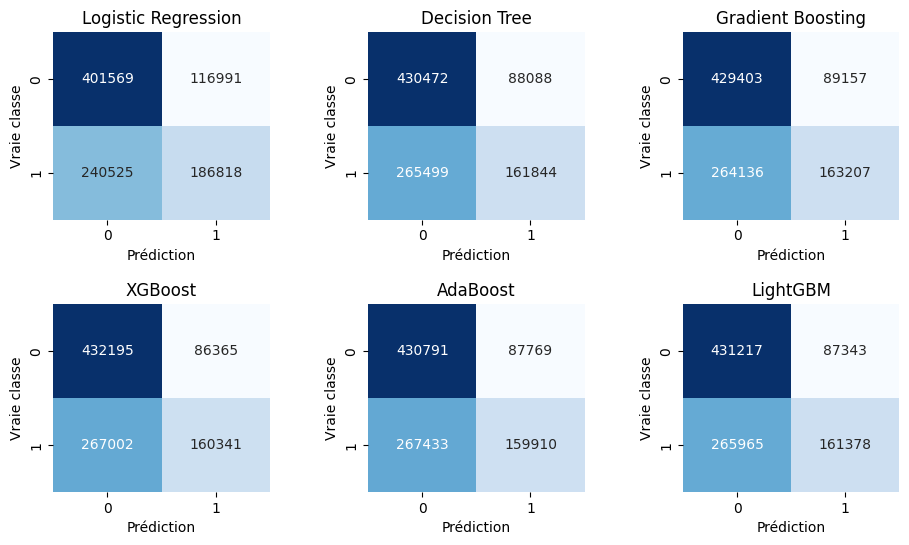

In [14]:
# Créer une figure avec une grille de sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# Ajuster l'espacement entre les sous-graphiques
fig.tight_layout(pad=4.0)

# Parcourir les modèles et leurs chemins
for idx, (model_name, model_path) in enumerate(model_paths):
    # Charger le modèle
    model = joblib.load(model_path)
    
    # Obtenir la matrice de confusion
    cm = model['confusion_matrix']
    
    # Calculer les coordonnées dans la grille (2 lignes, 3 colonnes)
    row = idx // 3
    col = idx % 3
    
    # Créer un sous-graphique
    ax = axes[row, col]
    
    # Utiliser seaborn pour afficher la matrice de confusion sous forme de heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False, ax=ax)
    
    # Configurer le titre et les étiquettes
    ax.set_title(model_name)
    ax.set_xlabel('Prédiction')
    ax.set_ylabel('Vraie classe')

# Afficher le graphique
plt.show()
